In [130]:
path="https://raw.githubusercontent.com/Ashutoshrx/Covid-19/master/total_cases.csv"

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [73]:
data=pd.read_csv(path)
#data=data.dropna()
data.head()

,id,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1,31-12-19,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2,01-01-20,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,3,02-01-20,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,4,03-01-20,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,5,04-01-20,44,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [74]:
len(data)

274

In [77]:
data1=data[['id','World']]

In [78]:
data1.head()

,id,World
0,1,27
1,2,27
2,3,27
3,4,44
4,5,44


In [79]:
len(data1)

274

In [81]:
#preparattion of the data
x=np.array(data['id']).reshape(-1,1)
y=np.array(data['World']).reshape(-1,1)

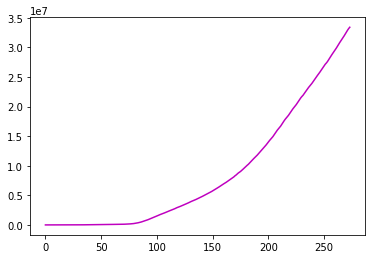

In [82]:
plt.plot(y,'-m')
plt.show()

In [104]:
PolyFeat=PolynomialFeatures(degree=3)
x=PolyFeat.fit_transform(x)

In [105]:
x

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.47363226e+09, 1.48882797e+12, 4.04961209e+14],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.55457184e+09, 1.51639811e+12, 4.13976685e+14],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.63640578e+09, 1.54437518e+12, 4.23158800e+14]])

In [106]:
#training Data
model=linear_model.LinearRegression()
model.fit(x,y)
accuracy=model.score(x,y)
print(f"Accuracy:{round(accuracy*100,3)}%")

Accuracy:99.973%


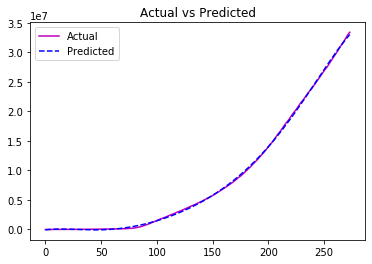

In [129]:
y0=model.predict(x)
plt.title('Actual vs Predicted')
plt.plot(y,'-m',label='Actual')
plt.plot(y0,'--b',label='Predicted')
plt.legend()
plt.savefig('final.png')
plt.show()
